# LogisticRegression + SMOTE : 解決數據不平衡

## Step 1: 導入所需的套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score

## 導入SMOTE
from imblearn.over_sampling import SMOTE

## Step 2: 導入數據集

In [2]:
## 導入數據集
data = pd.read_csv('b_depressed.csv')

In [3]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Step 3: 處理缺失值

In [4]:
data.dropna(inplace=True)

In [5]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Step 4: 數據整理

In [6]:
#刪除無用資，如個人ID與村莊ID
data.drop(['Survey_id','Ville_id'],axis=1,inplace=True)

In [7]:
data

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1,25,1,1,7,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,1,28,1,4,10,6,15711078,24023054,15506558,10476722,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,1,66,0,0,1,1,42440731,22861940,22562605,12545372,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,1,51,1,1,12,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


## Step 5: 自訂自變量和應變量

In [8]:
#建立feature資料集
X = data.drop(['depressed'],axis=1)
#建立target資料集
y = data['depressed']

In [9]:
#數據量
print(X.shape)
print(y.shape)

(1409, 20)
(1409,)


## Step 6: 使用SMOTE來重組資料
參考資料：[Python 演算法 Day 15 - Imbalanced Data](https://ithelp.ithome.com.tw/articles/10283392)</br>
![替代文字](image1.png)</br>
參考資料：[imbalanced-learn.org](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)</br>
![替代文字](image2.png)

In [10]:
#平衡數據           'minority'：僅對少數類別進行重新採樣                
smote_data = SMOTE(sampling_strategy='minority', random_state=42)

#應用SMOTE重新抽樣
X_resampled, y_resampled = smote_data.fit_resample(X, y)

In [11]:
#重新抽樣數據量
print(X_resampled.shape)
print(y_resampled.shape)

(2348, 20)
(2348,)


## Step 7: 製圖觀察SMOTE重組後資料情況

In [12]:
#將重新抽樣data組成DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['depressed'] = y_resampled

In [13]:
resampled_data

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,2.829271e+07,0
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,2.829271e+07,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,2.829271e+07,0
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,0,1,0,1,22288055,18751329,0,7781123,6.921976e+07,0
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,1,0,0,0,53384566,20731006,1,20100562,4.341945e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,1,58,0,0,7,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,2.829271e+07,1
2344,1,40,1,1,12,3,33405614,46909658,86025095,37995297,...,0,0,0,0,10867332,19908852,0,50560308,3.121627e+07,1
2345,1,27,1,2,5,5,28912201,22861940,23399979,26692283,...,0,0,0,0,30028818,31363432,0,28411718,2.829271e+07,1
2346,1,29,1,2,13,4,61213160,34822879,26454490,9756410,...,0,0,0,0,18330894,89866949,0,34578304,2.145360e+07,1


<Axes: xlabel='depressed', ylabel='count'>

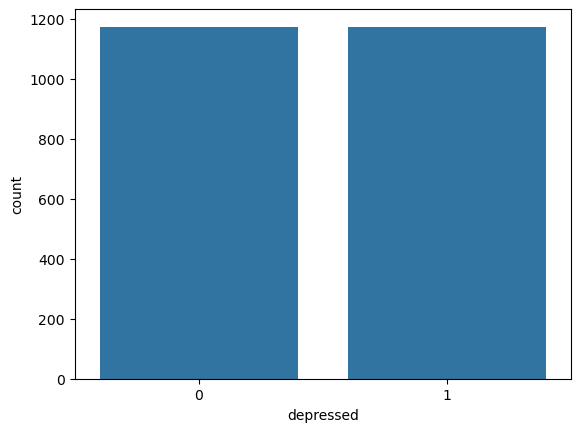

In [14]:
#憂鬱症分布情況
sns.countplot(x='depressed', data=resampled_data)

## Step 8: 數據標準化

In [15]:
scaler = StandardScaler()
columns_to_standardize = ['Age', 'Number_children', 'total_members', 'gained_asset', 
                          'durable_asset', 'save_asset', 'living_expenses','other_expenses',
                         'incoming_agricultural','farm_expenses','lasting_investment','no_lasting_investmen']
resampled_data[columns_to_standardize] = scaler.fit_transform(resampled_data[columns_to_standardize])

## Step 9: 自訂自變量和應變量

In [16]:
#建立feature資料集
X_resamp = resampled_data.drop(['depressed'],axis=1)

#建立target資料集
y_resamp = resampled_data['depressed']

## Step 10: 切割數據train set與test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=69)

## Step 11: 建立訓練組邏輯迴歸模型 

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Step 12: 模型表現：計算accuracy及結果顯示 

In [19]:
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

In [21]:
#利用metrics評估模型性能指標
acc_test = accuracy_score(y_test,predictions_test)
prec_test = precision_score(y_test, predictions_test)
rec_test = recall_score(y_test,predictions_test)
f1_test = f1_score(y_test,predictions_test)
results_test = pd.DataFrame([['Logistic Regression(test)', acc_test,prec_test,rec_test,f1_test]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])

acc_train = accuracy_score(y_train,predictions_train)
prec_train = precision_score(y_train, predictions_train)
rec_train = recall_score(y_train,predictions_train)
f1_train = f1_score(y_train,predictions_train)
results_train = pd.DataFrame([['Logistic Regression(train)', acc_train,prec_train,rec_train,f1_train]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])

results = pd.concat([results_train,results_test])
print(results)

                        Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression(train)  0.533546   0.529228  0.713985  0.607878
0   Logistic Regression(test)  0.561702   0.526154  0.766816  0.624088


## 小結：使用SMOTE解決數據差異過大，導致少數資料被忽略的問題
模型目前存在問題：
1. 特徵數過多->利用RFE挑選特徵
2. 模型不可靠，正確率低